In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import math
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
data_path = ('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
crime_df = pd.read_excel(data_path, header=1,
                         index_col=False, skiprows=[0, 1, 2], skipfooter=3)
crime_df.head(20)


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [5]:
crime_df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [6]:
#Clean up column names
crime_df.columns=['City','Population', 'Violent crime', 'Murder', 'Rape revised', 'Rape legacy', 'Robbery', 
         'Aggravated assault','Property crime', 'Burglary', 'Larceny', 'Motor vehicle theft', 'Arson']
crime_df.head(20)

,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [7]:
#Drop Rape Revised columns since it doesn't contain any data
crime_df.drop('Rape revised', 1)

,City,Population,Violent crime,Murder,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0.000


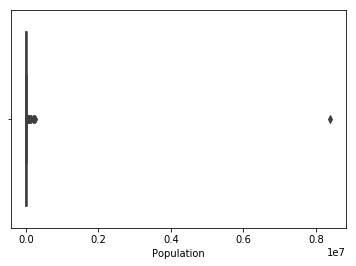

In [8]:
#Graph data and see how it looks--if anything is out of whack
sns.boxplot(crime_df.Population)
plt.show()

In [9]:
#hmmm looks like we have one major outlier. Let's figure out what it is
crime_df['Population'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64

#Make residual a column in the dataframe
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)
crime_df['residual'] = crime_df['Population'] - regr.predict(X).ravel()

In [10]:
outlier = crime_df.loc[crime_df['Population'] == 8396126.000]
print(outlier)

         City  Population  Violent crime  Murder  Rape revised  Rape legacy  \
216  New York     8396126          52384     335           nan         1112   

     Robbery  Aggravated assault  Property crime  Burglary  Larceny  \
216    19170               31767          141971     16606   117931   

     Motor vehicle theft  Arson  
216                 7434    nan  


In [11]:
#Looks like New York City is skewing our data, so we'll have to transform the variable. 
#Lets try taking the log of that column of data to see if that normalizes the data

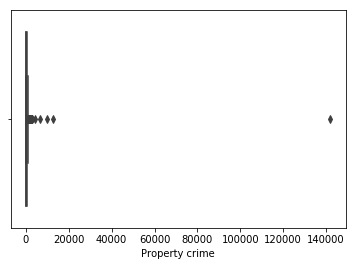

In [12]:
sns.boxplot(crime_df['Property crime'])

In [13]:
crime_df['pop_log'] = np.log(crime_df['Population'])
#control for zero values by adding a value of 1 to each row (can't log zero values)
crime_df['Property crime'] = crime_df['Property crime'] + 1
crime_df['prop_crime_log'] = np.log(crime_df['Property crime'])

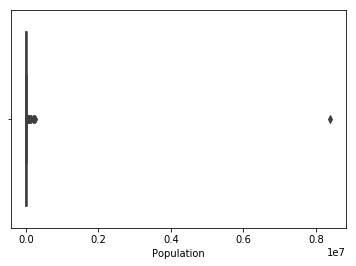

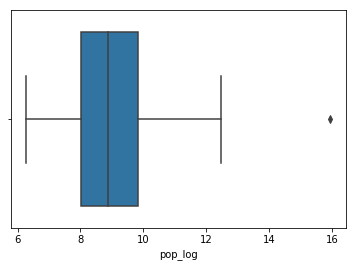

In [14]:
sns.boxplot(crime_df.Population)
plt.show()
sns.boxplot(crime_df.pop_log)
plt.show()

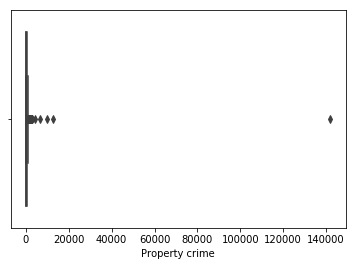

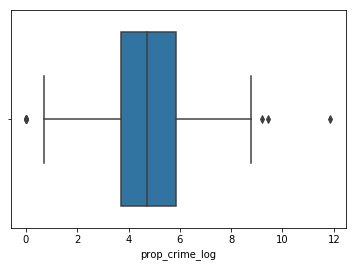

In [15]:
sns.boxplot(crime_df["Property crime"])
plt.show()
sns.boxplot(crime_df.prop_crime_log)
plt.show()

In [16]:
#let's turn murder and robbery into binary features
crime_df['Robbery_Binary'] = crime_df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crime_df['Murder_Binary'] = crime_df['Murder'].apply(lambda x: 1 if x > 0 else 0)

crime_df.head(20)

,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson,pop_log,prop_crime_log,Robbery_Binary,Murder_Binary
0,Adams Village,1861,0,0,nan,0,0,0,13,2,10,0,0.000,7.529,2.565,0,0
1,Addison Town and Village,2577,3,0,nan,0,0,3,25,3,20,1,0.000,7.854,3.219,0,0
2,Akron Village,2846,3,0,nan,0,0,3,17,1,15,0,0.000,7.954,2.833,0,0
3,Albany,97956,791,8,nan,30,227,526,4091,705,3243,142,nan,11.492,8.317,1,1
4,Albion Village,6388,23,0,nan,3,4,16,224,53,165,5,nan,8.762,5.412,1,0
5,Alfred Village,4089,5,0,nan,0,3,2,47,10,36,0,nan,8.316,3.850,1,0
6,Allegany Village,1781,3,0,nan,0,0,3,11,0,10,0,0.000,7.485,2.398,0,0
7,Amherst Town,118296,107,1,nan,7,31,68,2119,204,1882,32,3.000,11.681,7.659,1,1
8,Amityville Village,9519,9,0,nan,2,4,3,211,16,188,6,1.000,9.161,5.352,1,0
9,Amsterdam,18182,30,0,nan,0,12,18,406,99,291,15,0.000,9.808,6.006,1,0


                pop_log  prop_crime_log  Robbery_Binary  Murder_Binary
pop_log           1.000           0.869           0.582          0.503
prop_crime_log    0.869           1.000           0.677          0.482
Robbery_Binary    0.582           0.677           1.000          0.313
Murder_Binary     0.503           0.482           0.313          1.000


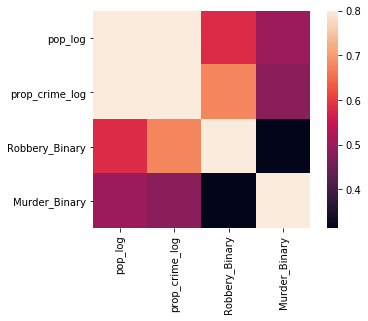

In [17]:
#The logged data looks a lot better, so let's stick with that. lets create a dataframe with variables we're 
#interested in and check the correlation

plotdf = crime_df.loc[:, ['pop_log', 'prop_crime_log', 'Robbery_Binary', 'Murder_Binary']]            
corrmat = plotdf.corr()
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)

In [18]:
#Looks like property crime and population are highly collinear, so let's remove population from our model

In [19]:
df = crime_df.loc[:, ['prop_crime_log','Robbery', 'Murder','Robbery_Binary', 'Murder_Binary']]   

In [20]:
df.dtypes

prop_crime_log    float64
Robbery             int64
Murder              int64
Robbery_Binary      int64
Murder_Binary       int64
dtype: object

In [21]:
df.prop_crime_log.astype(int)
df.dtypes

prop_crime_log    float64
Robbery             int64
Murder              int64
Robbery_Binary      int64
Murder_Binary       int64
dtype: object

In [22]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['prop_crime_log'].values.reshape(-1, 1)
X = df[['Robbery', 'Murder','Robbery_Binary', 'Murder_Binary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.37593340e-03  9.56567996e-02  2.01685613e+00  1.06333930e+00]]

Intercept: 
 [3.32201406]

R-squared:
0.5834552260840946


In [23]:
#use ols to test model

#set up linear formula
linear_formula = 'prop_crime_log ~ Murder_Binary+Robbery_Binary'
#Fit the model to our data using the formula.
lg_model = smf.ols(formula=linear_formula, data=df).fit()
#validate model
print ("R squared: ", lg_model.rsquared)
print ("\nParameters\n\n", lg_model.params)
print ("\nP-values\n\n", lg_model.pvalues)
print ("\nConfidence Intervals")
display(lg_model.conf_int())

R squared:  0.5391935040339744

Parameters

 Intercept        3.320
Murder_Binary    1.451
Robbery_Binary   2.012
dtype: float64

P-values

 Intercept        0.000
Murder_Binary    0.000
Robbery_Binary   0.000
dtype: float64

Confidence Intervals


,0,1
Intercept,3.128,3.512
Murder_Binary,1.084,1.819
Robbery_Binary,1.751,2.273


In [24]:
#redo model with popultion to test residuals

In [25]:
df = crime_df.loc[:, ['prop_crime_log', 'pop_log','Robbery', 'Murder','Robbery_Binary', 'Murder_Binary']]   

In [26]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['prop_crime_log'].values.reshape(-1, 1)
X = df[['pop_log','Robbery', 'Murder','Robbery_Binary', 'Murder_Binary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 9.25509354e-01 -6.35007634e-04  3.69482518e-02  9.08055064e-01
   1.77302064e-01]]

Intercept: 
 [-4.13831802]

R-squared:
0.8035760212822405


In [27]:
#Our r-squared value is pretty low, so let's add population in and try again
linear_formula = 'prop_crime_log ~ pop_log+Murder_Binary+Robbery_Binary'
lg_model = smf.ols(formula=linear_formula, data=crime_df).fit()
#validate model
print ("R squared: ", lg_model.rsquared)
print ("\nParameters\n\n", lg_model.params)
print ("\nP-values\n\n", lg_model.pvalues)
print ("\nConfidence Intervals")
display(lg_model.conf_int())

R squared:  0.8017518623291409

Parameters

 Intercept        -4.259
pop_log           0.940
Murder_Binary     0.258
Robbery_Binary    0.887
dtype: float64

P-values

 Intercept        0.000
pop_log          0.000
Murder_Binary    0.057
Robbery_Binary   0.000
dtype: float64

Confidence Intervals


,0,1
Intercept,-4.968,-3.549
pop_log,0.854,1.027
Murder_Binary,-0.007,0.523
Robbery_Binary,0.687,1.087


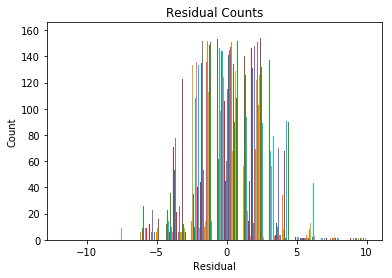

In [28]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual, bins=12)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Counts')
plt.show()

In [29]:
#that looks pretty normal.let's move on to testing model performance

data = X
target = Y
print(data.shape)
print(target.shape)
#print(data)
#print(target)

# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)
# Test using the classifier, not the bernoulli this time
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
print(clf)

# Cross Validation
# Estimate the accuracy of a linear kernel support vector machine on the dataset by splitting the data,
# fitting a model and computing the score 4 consecutive times (with different splits each time).
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, data, target, cv=4)
print(scores)

# Mean scores and 95% confidence intervals
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(348, 5)
(348, 1)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [30]:
print(X_train.dtypes)

pop_log           float64
Robbery             int64
Murder              int64
Robbery_Binary      int64
Murder_Binary       int64
dtype: object


In [36]:
#looks like the model isn't working due to one of the columns being a float instead of an integer.
Y = Y.astype(int)

In [37]:
#check to make sure it converted
print(Y.dtype)

int64


In [38]:
#rerun the model
data = X
target = Y
print(data.shape)
print(target.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
print(clf)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, data, target, cv=4)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(348, 5)
(348, 1)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
[0.4516129  0.55681818 0.46428571 0.44578313]
Accuracy: 0.48 (+/- 0.09)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/u